In [4]:
# Testing comparison of ha HK files and csv HK files

import pandas as pd 
from pathlib import Path 
import PC_Fns

In [59]:
ProcDir = Path(r"C:\Users\ucasbwh\Desktop\Ha Dev\PROC")
"""Looks for HK generated by .csv and .ha and compares the two."""

# Find Files
RAW_ha = PC_Fns.Find_Files(
    ProcDir, "*_ha_Unproc_HKTM.pickle", SingleFile=True)
if not RAW_ha:
    print("No .ha generated HK files found")

RAW_csv = PC_Fns.Find_Files(
    ProcDir, "*_csv_Unproc_HKTM.pickle", SingleFile=True)
if not RAW_csv:
    print("No .csv generated HK files found")

ha = pd.read_pickle(RAW_ha[0])
csv = pd.read_pickle(RAW_csv[0])

ha_bin = ha
csv_bin = pd.DataFrame()
csv_bin['RAW'] = csv['RAW'].apply(lambda x: bytearray.fromhex(x))
csv_bin = PC_Fns.ReturnCUC_RAW(csv_bin, csv_bin['RAW'])

print(ha_bin)
print(csv_bin)


#if ha['RAW'] == (csv['RAW'].apply(lambda x: bytearray.fromhex(x))):
#    print("Hey they match")
#else:
#    print("Unlucky chap")


RAW         Pkt_CUC Source
0    b'\x15\x07%\xaf\x16\x17\xaaD\x00\x00M\x00\x07\...  41433920154180    .ha
1    b'\x15\x07%\xaf\x16\x18\xaaD\x00\x00M\x00\x07\...  41433920219716    .ha
2    b'\x15\x07%\xaf\x16\x19\xaaD\x00\x00M\x00\x07\...  41433920285252    .ha
3    b'\x15\x07%\xaf\x16\x1a\xaaD\x00\x00M\x00\x07\...  41433920350788    .ha
4    b'\x15\x07%\xaf\x16\x1b\xaaD\x00\x00M\x00\x07\...  41433920416324    .ha
..                                                 ...             ...    ...
571  b'5\x03%\xaf\x18R\xaaD\x00\x00=\x00\x07\x12\x0...  41433957575236    .ha
572  b'\x15\x07%\xaf\x18S\xaaD\x00\x00M\x00\x07\x12...  41433957640772    .ha
573  b'\x15\x07%\xaf\x18T\xaaD\x00\x00M\x00\x07\x12...  41433957706308    .ha
574  b'\x15\x07%\xaf\x18U\xaaD\x00\x00M\x00\x07\x12...  41433957771844    .ha
575  b'\x15\x07%\xaf\x18V\xaaD\x00\x00M\x00\x07\x10...  41433957837380    .ha

[576 rows x 3 columns]
                                                   RAW         Pkt_CUC
0    [21, 7, 37, 175

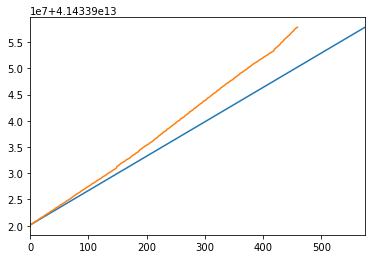

In [54]:
import matplotlib.pyplot as plt 

ha_bin['Pkt_CUC'].plot()
csv_bin['Pkt_CUC'].plot()

RAW         Pkt_CUC  \
0    [21, 7, 37, 175, 22, 23, 170, 68, 0, 0, 77, 0,...  41433920154180   
1    [21, 7, 37, 175, 22, 24, 170, 68, 0, 0, 77, 0,...  41433920219716   
2    [21, 7, 37, 175, 22, 25, 170, 68, 0, 0, 77, 0,...  41433920285252   
3    [21, 7, 37, 175, 22, 26, 170, 68, 0, 0, 77, 0,...  41433920350788   
4    [21, 7, 37, 175, 22, 27, 170, 68, 0, 0, 77, 0,...  41433920416324   
..                                                 ...             ...   
455  [21, 7, 37, 175, 24, 81, 170, 68, 0, 0, 77, 0,...  41433957509700   
456  [21, 7, 37, 175, 24, 83, 170, 68, 0, 0, 77, 0,...  41433957640772   
457  [21, 7, 37, 175, 24, 84, 170, 68, 0, 0, 77, 0,...  41433957706308   
458  [21, 7, 37, 175, 24, 85, 170, 68, 0, 0, 77, 0,...  41433957771844   
459  [21, 7, 37, 175, 24, 86, 170, 68, 0, 0, 77, 0,...  41433957837380   

    CUC_Change  
0          NaN  
1      1.00002  
2      1.00002  
3      1.00002  
4      1.00002  
..         ...  
455    1.00002  
456    2.00003  
457    1.

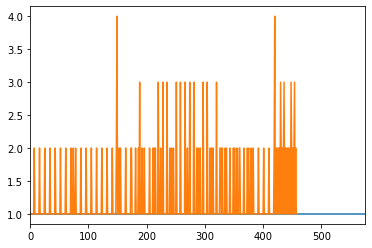

In [60]:
ha_bin['CUC_Change'] = (ha_bin['Pkt_CUC'].diff())/0xFFFF
csv_bin['CUC_Change'] = (csv_bin['Pkt_CUC'].diff())/0xFFFF

ha_bin['CUC_Change'].plot()
csv_bin['CUC_Change'].plot()

#print(ha_bin)
print(csv_bin)

In [66]:
Test = pd.merge(ha_bin, csv_bin, on=['Pkt_CUC'])
print(len(ha_bin))
print(len(csv_bin))
print(len(Test))

print(Test)

576
460
460
                                                 RAW_x         Pkt_CUC Source  \
0    b'\x15\x07%\xaf\x16\x17\xaaD\x00\x00M\x00\x07\...  41433920154180    .ha   
1    b'\x15\x07%\xaf\x16\x18\xaaD\x00\x00M\x00\x07\...  41433920219716    .ha   
2    b'\x15\x07%\xaf\x16\x19\xaaD\x00\x00M\x00\x07\...  41433920285252    .ha   
3    b'\x15\x07%\xaf\x16\x1a\xaaD\x00\x00M\x00\x07\...  41433920350788    .ha   
4    b'\x15\x07%\xaf\x16\x1b\xaaD\x00\x00M\x00\x07\...  41433920416324    .ha   
..                                                 ...             ...    ...   
455  b'\x15\x07%\xaf\x18Q\xaaD\x00\x00M\x00\x07\x12...  41433957509700    .ha   
456  b'\x15\x07%\xaf\x18S\xaaD\x00\x00M\x00\x07\x12...  41433957640772    .ha   
457  b'\x15\x07%\xaf\x18T\xaaD\x00\x00M\x00\x07\x12...  41433957706308    .ha   
458  b'\x15\x07%\xaf\x18U\xaaD\x00\x00M\x00\x07\x12...  41433957771844    .ha   
459  b'\x15\x07%\xaf\x18V\xaaD\x00\x00M\x00\x07\x10...  41433957837380    .ha   

    CUC_Change_

In [90]:
x = Test.columns[0]
print((Test['RAW_x'] == Test['RAW_y']).value_counts())

True    460
dtype: int64


In [ ]:
### Now the experiment is over this is the good code. 

import pandas as pd 
from pathlib import Path 
import PC_Fns

In [ ]:
ProcDir = Path(r"C:\Users\ucasbwh\Desktop\Ha Dev\PROC")
"""Looks for HK generated by .csv and .ha and compares the two."""

# Find Files
RAW_ha = PC_Fns.Find_Files(
    ProcDir, "*_ha_Unproc_HKTM.pickle", SingleFile=True)
if not RAW_ha:
    print("No .ha generated HK files found")

RAW_csv = PC_Fns.Find_Files(
    ProcDir, "*_csv_Unproc_HKTM.pickle", SingleFile=True)
if not RAW_csv:
    print("No .csv generated HK files found")

ha = pd.read_pickle(RAW_ha[0])
csv = pd.read_pickle(RAW_csv[0])

ha_bin = ha
csv_bin = pd.DataFrame()
csv_bin['RAW'] = csv['RAW'].apply(lambda x: bytearray.fromhex(x))
csv_bin = PC_Fns.ReturnCUC_RAW(csv_bin, csv_bin['RAW'])

In [106]:
# First check that all CUC entries within csv_bin are within ha_bin
result = pd.merge(ha_bin, csv_bin, on=['Pkt_CUC'], how='inner')
if (len(result)-len(csv_bin)) > 0:
    print("Data contained within .csv HK not present in .ha HK")

# Next confirm that the RAW is equivalent
comp = result['RAW_x'] != result['RAW_y']
mismatch = result[comp]
if len(mismatch) > 0:
    print("Found some mismatch")